# Task 6

## Part 1

Get data from https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv 

Plot: 
- The temperature 
- the mean temmperature each day 
- the mean temperature for each month


In [1]:
# import packages 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [18]:
# get data from url 
url = 'https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv'
# get data from row 21 (skip metadata), set date (col 1) as index. 
# See: https://stackoverflow.com/questions/36606931/how-to-set-in-pandas-the-first-column-and-row-as-index 
# see: https://stackoverflow.com/questions/20637439/skip-rows-during-csv-import-pandas 
weather = pd.read_csv(url, skiprows=22)

# preview of data
weather.head(10)

/tmp/ipykernel_5602/189639187.py:6: DtypeWarning: Columns (2,10,12,14,15,16,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  weather = pd.read_csv(url, skiprows=22)


,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
0,10-apr-1996 14:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,0,0,0,0,25,81,0.0,35000,32,5
1,31-jul-1996 08:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,0,0,0,25,82,0.0,40000,45,5
2,31-jul-1996 09:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,0,0,0,0,80,81,0.0,8000,32,7
3,31-jul-1996 10:00,0,0.0,0,12.9,0,11.3,9.8,0.0,0,...,0,0,0,0,25,82,0.0,28000,35,6
4,31-jul-1996 11:00,0,0.0,0,14.5,0,10.8,7.0,0.0,0,...,0,0,0,0,2,11,0.0,40000,40,6
5,31-jul-1996 12:00,0,0.0,0,14.4,0,10.9,7.3,0.0,0,...,0,0,0,0,1,82,0.0,40000,43,6
6,31-jul-1996 13:00,0,0.0,0,14.9,0,10.9,6.7,0.0,0,...,0,0,0,0,2,11,0.0,40000,43,5
7,31-jul-1996 14:00,0,0.0,0,13.9,0,10.4,6.7,0.0,0,...,0,0,0,0,2,11,0.0,50000,45,6
8,31-jul-1996 15:00,0,0.0,0,13.2,0,10.9,8.6,0.0,0,...,0,0,0,0,25,82,0.0,8000,45,7
9,31-jul-1996 16:00,0,0.0,0,15.1,0,11.3,7.5,0.0,0,...,0,0,0,0,25,82,0.0,35000,40,7


In [24]:
# change date format to datetime 
weather['date'] = pd.to_datetime(weather['date'])

/tmp/ipykernel_5602/2356378053.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  weather['date'] = pd.to_datetime(weather['date'])


In [28]:
weather.set_index('date')

weather.head(5)

,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt,date_dt
0,1996-04-10 14:00:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,0,0,0,25,81,0.0,35000,32,5,1996-04-10 14:00:00
1,1996-07-31 08:00:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,0,0,25,82,0.0,40000,45,5,1996-07-31 08:00:00
2,1996-07-31 09:00:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,0,0,0,80,81,0.0,8000,32,7,1996-07-31 09:00:00
3,1996-07-31 10:00:00,0,0.0,0,12.9,0,11.3,9.8,0.0,0,...,0,0,0,25,82,0.0,28000,35,6,1996-07-31 10:00:00
4,1996-07-31 11:00:00,0,0.0,0,14.5,0,10.8,7.0,0.0,0,...,0,0,0,2,11,0.0,40000,40,6,1996-07-31 11:00:00


In [29]:
# select only data from 1996. https://pandas.pydata.org/docs/reference/api/pandas.Series.str.contains.html
start = "1996-04-10 14:00:00"
end = "1996-12-31 23:00:00"
weather_1996 = weather.loc[start:end]

weather_1996

,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt,date_dt


Text(0.5, 0, 'apr-dec 1996')

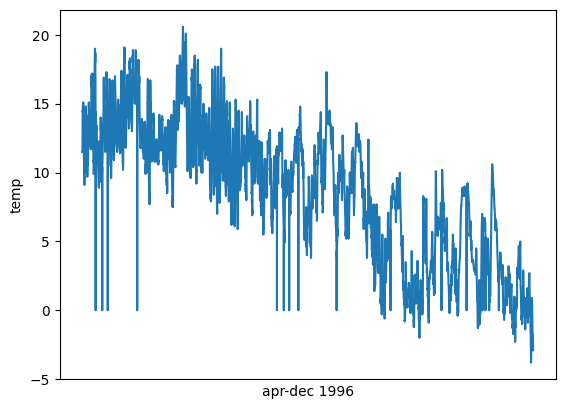

In [23]:
# plot temperature. See: https://seaborn.pydata.org/generated/seaborn.lineplot.html 

fig, ax = plt.subplots()
sns.lineplot(data=weather_1996, x = 'date', y = 'temp')
ax.set_xticks([])
ax.set_xlabel("apr-dec 1996")

In [ ]:
# Resampling to get daily mean temperatures 

